In [20]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(N):
    """Initialize a NxN lattice with random spins."""
    return np.random.choice([-1, 1], size=(N, N))

def metropolis_step(lattice, beta):
    """Perform a single Metropolis step."""
    N = lattice.shape[0]
    for _ in range(N * N):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        s = lattice[i, j]
        neighbors = lattice[(i+1)%N, j] + lattice[(i-1)%N, j] + lattice[i, (j+1)%N] + lattice[i, (j-1)%N]
        dE = 2 * s * neighbors
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] = -s
    return lattice

def compute_correlation(lattice):
    """Compute the correlation function G(r)."""
    N = lattice.shape[0]
    correlation = np.zeros(N // 2)
    for i in range(N):
        for j in range(N):
            for r in range(N // 2):
                correlation[r] += lattice[i, j] * lattice[i, (j + r) % N]
    correlation /= (N * N)
    correlation /= correlation[0]
    return correlation

def compute_magnetization(lattice):
    """Compute the magnetization of the lattice."""
    return np.sum(lattice)

def simulate_ising(N, T, steps):
    """Simulate the Ising model at temperature T."""
    beta = 1.0 / T
    lattice = initialize_lattice(N)
    mag = []
    for _ in range(steps):
        lattice = metropolis_step(lattice, beta)
        if _ % 10 == 0:  # Sampling interval
            mag.append(abs(compute_magnetization(lattice)) / (N * N))
    return lattice, np.mean(mag)

def plot_correlation(correlation, T):
    """Plot the correlation function."""
    plt.figure()
    plt.plot(correlation, 'o-', label=f'T={T}')
    plt.xlabel('Distance r')
    plt.ylabel('Correlation G(r)')
    plt.legend()
    plt.show()

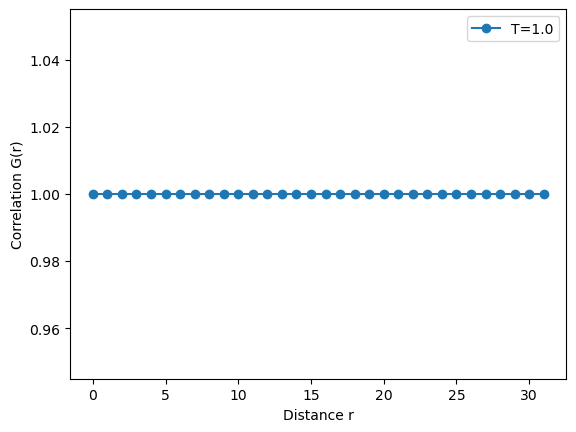

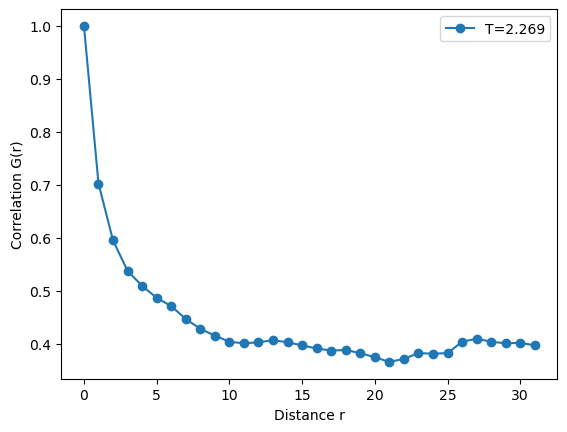

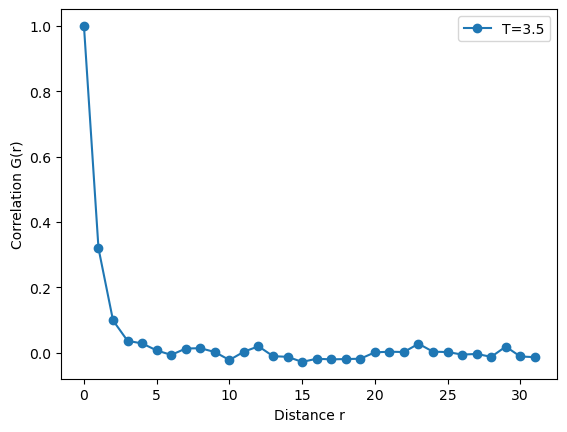

In [2]:
# Parameters
N = 64  # Lattice size
steps = 1000  # Number of Metropolis steps
temperatures = [1.0, 2.269, 3.5]  # Example temperatures (below Tc, at Tc, above Tc)

for T in temperatures:
    lattice, _ = simulate_ising(N, T, steps)
    correlation = compute_correlation(lattice)
    plot_correlation(correlation, T)

### Explanation:

1. **Initialize the Lattice**: We start with a random $N \times N$ lattice of spins.
2. **Metropolis Algorithm**: This function performs a Metropolis step to update the lattice configuration.
3. **Compute Correlation Function**: This function calculates the correlation function $G(r)$.
4. **Simulate the Ising Model**: This function runs the simulation for a given temperature and number of steps.
5. **Plot Correlation**: This function plots the corr|elation function for different temperatures.

### Running the Code:

1. **Temperature Parameters**:
- $T = 1.0$ (below critical temperature $T_c$)
- $T = 2.269$ (around the critical temperature $T_c$)
- $T = 3.5$ (above critical temperature $T_c$)
2. **Lattice Size and Steps**: We use a $64 \times 64$ lattice and $1000$ Metropolis steps to equilibrate the system.  
3. **Output**: The correlation function $G(r)$ is plotted for each temperature, showing how correlations decay with distance.

### Interpretation:

- **Below $T_c$**: The correlation function decays slowly, indicating long-range correlations.
- **At $T_c$**: The correlation function decays more slowly compared to below $T_c$, reflecting the divergence of the correlation length.
- **Above $T_c$**: The correlation function decays rapidly, indicating short-range correlations.

This example illustrates how the correlation length changes with temperature in the Ising model. The exact values of the correlation length can be estimated from the decay of the correlation function, typically fitting an exponential decay for temperatures below and above $T_c$ and a power-law decay at $T_c$.

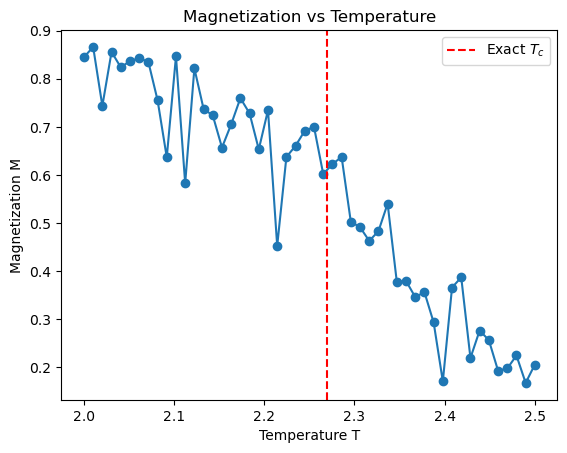

In [22]:
# Parameters
N = 32  # Lattice size
steps = 1000  # Number of Metropolis steps
temperatures = np.linspace(2.0, 2.5, 50)  # Temperature range around T_c

# Simulate and collect magnetization data
results = [simulate_ising(N, T, steps) for T in temperatures]
lattices, magnetizations = zip(*results)

# Plot magnetization as a function of temperature
plt.plot(temperatures, magnetizations, 'o-')
plt.xlabel('Temperature T')
plt.ylabel('Magnetization M')
plt.title('Magnetization vs Temperature')
plt.axvline(2.269, color='r', linestyle='--', label='Exact $T_c$')
plt.legend()
plt.show()